In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
import time 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
input_dim = X_train.shape[1] * X_train.shape[2]  # 28*28
output_dim = num_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [7]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## In this task, you'll implement several ANN models with different batch sizes. Specifically, do the following:

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 8 as the mini-batch size.

In [8]:
# make build model function
def build_model(optimizer=SGD,model_name='Model',activation='relu',output_activation='softmax',metrics='accuracy',
                loss='categorical_crossentropy',batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation=activation))
  # second layer
  model.add(Dense(64 ,activation=activation))
  # fifth layer/output layer with output activation
  model.add(Dense(y_train.shape[1] ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)
  
  return model, history

# make model results visualization function
def model_results(model,history,model_name='Model'):
  # dataframe with epoch history
  model_df = pd.DataFrame(history.history)
  # plot model loss over epochs
  model_df[['loss', 'val_loss']].plot(figsize=(20,10))
  plt.title(f'{model_name} Loss'.capitalize() )
  plt.show()
  # plot model accuracy over epochs
  model_df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
  plt.title(f'{model_name} Accuracy'.capitalize() )
  plt.show()  
  # final epoch model results
  results = model.evaluate(X_test, y_test, verbose=0)
  print(f'{model_name} Loss: '.capitalize() , round(results[0],6))
  print(f'{model_name} Accuracy: '.capitalize() , round(results[1],6))

Epoch 1/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.6154 - accuracy: 0.8311 - val_loss: 0.2145 - val_accuracy: 0.9362
Epoch 2/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1887 - accuracy: 0.9449 - val_loss: 0.1451 - val_accuracy: 0.9555
Epoch 3/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1319 - accuracy: 0.9608 - val_loss: 0.1107 - val_accuracy: 0.9649
Epoch 4/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0968 - accuracy: 0.9724 - val_loss: 0.0969 - val_accuracy: 0.9708
Epoch 5/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0816 - accuracy: 0.9762 - val_loss: 0.0885 - val_accuracy: 0.9726
Epoch 6/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0656 - accuracy: 0.9811 - val_loss: 0.0952 - val_accuracy: 0.9701
Epoch 7/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0573 - accuracy: 0.9834 - val_loss: 0.0779 - val_ac

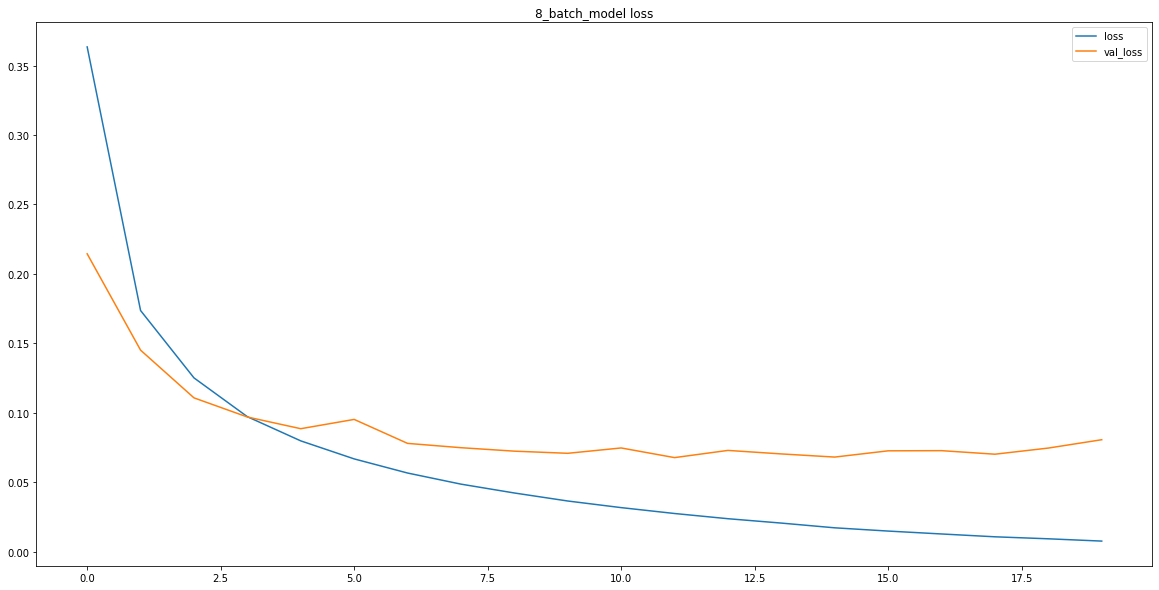

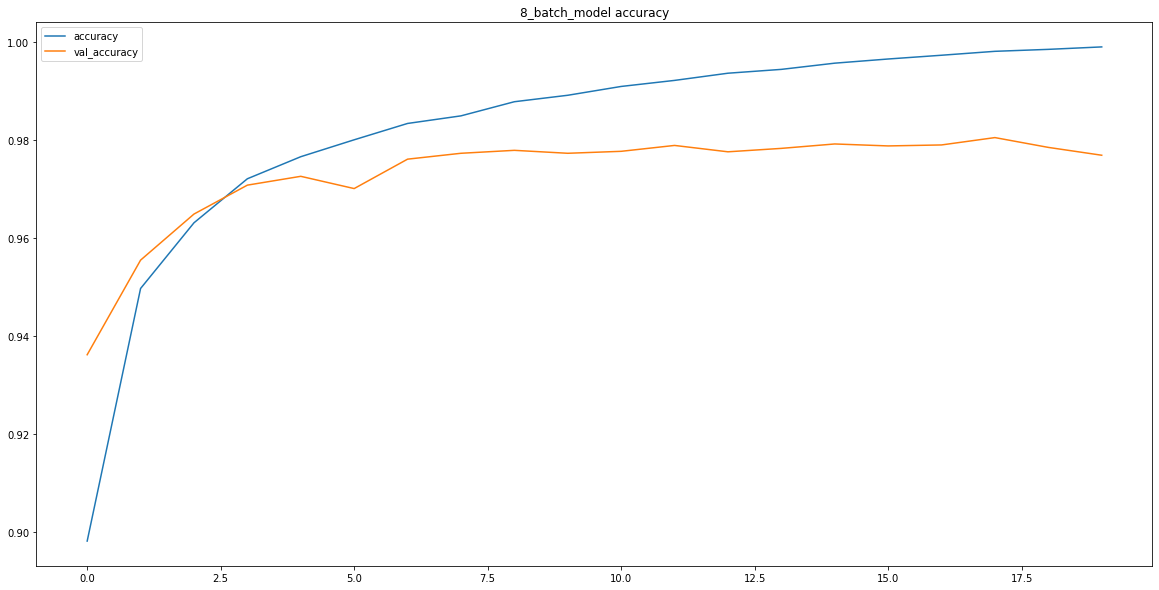

8_batch_model loss:  0.080551
8_batch_model accuracy:  0.9769
00 hours, 04 minutes, 02 seconds


In [9]:
# start run time
start_time = time.time() 
# build 8 batch model
model_8_batch, model_8_batch_history = build_model(batch_size=8,epochs=nb_epoch)

# model results and visuals
model_8_batch_results = model_results(model_8_batch, model_8_batch_history, model_name='8_Batch_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 128 as the mini-batch size.

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7202 - accuracy: 0.4991 - val_loss: 0.6060 - val_accuracy: 0.8491
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5515 - accuracy: 0.8575 - val_loss: 0.4046 - val_accuracy: 0.8941
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4041 - accuracy: 0.8895 - val_loss: 0.3425 - val_accuracy: 0.9056
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3498 - accuracy: 0.9011 - val_loss: 0.3133 - val_accuracy: 0.9125
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3309 - accuracy: 0.9055 - val_loss: 0.2915 - val_accuracy: 0.9170
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2950 - accuracy: 0.9168 - val_loss: 0.2745 - val_accuracy: 0.9211
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2791 - accuracy: 0.9206 - val_loss: 0.2622 - val_accuracy: 0.9241
Epoch 

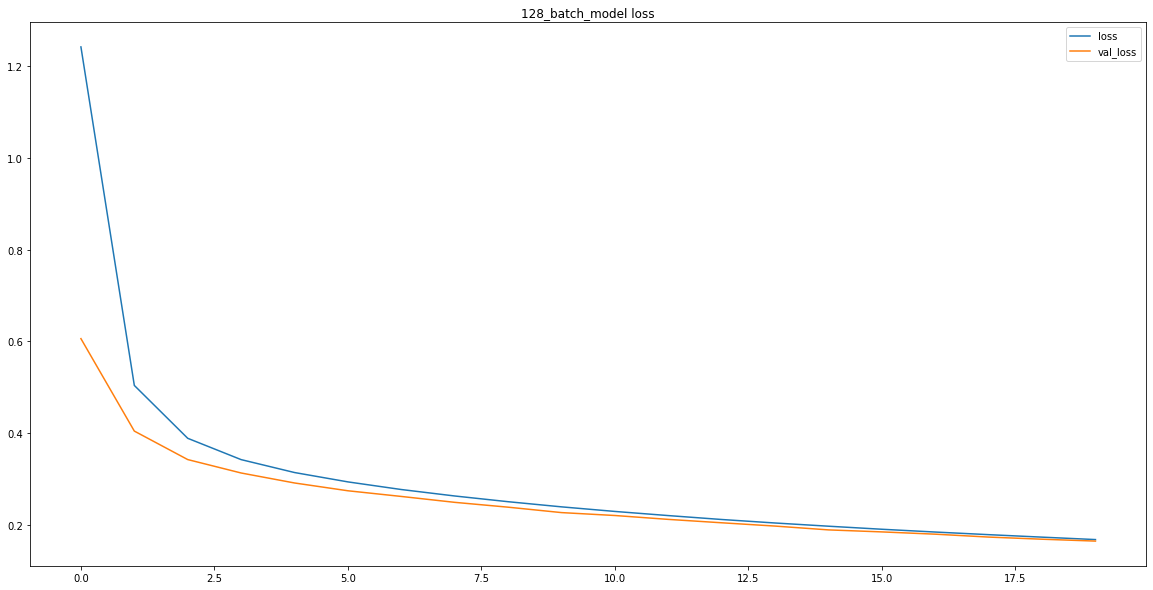

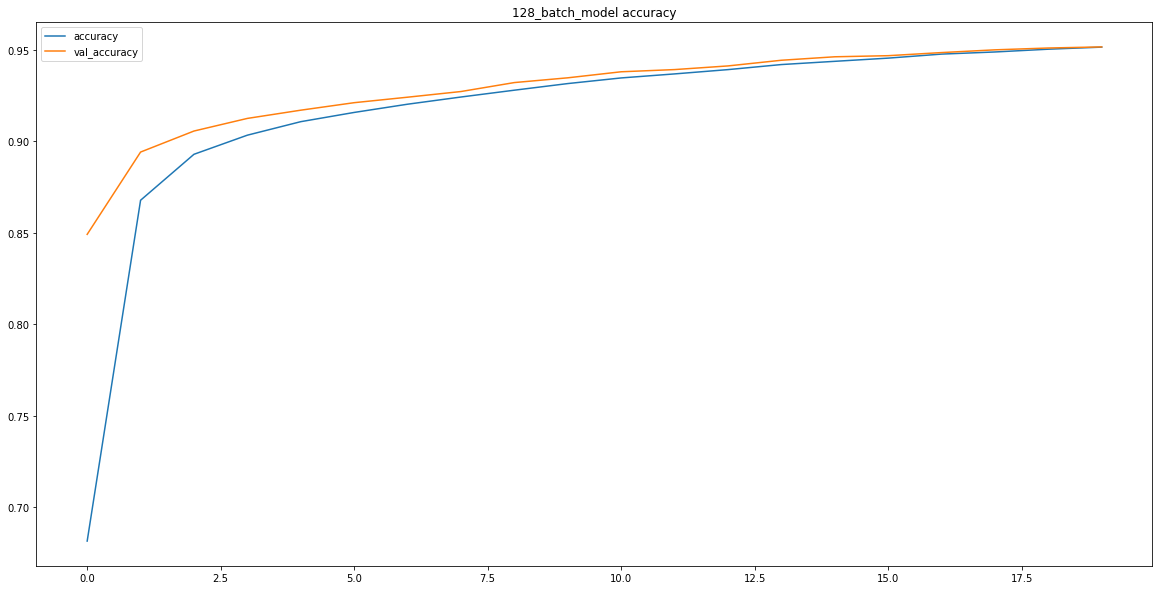

128_batch_model loss:  0.164888
128_batch_model accuracy:  0.9516
00 hours, 00 minutes, 35 seconds


In [10]:
# start run time
start_time = time.time() 
# build 128 batch model
model_128_batch, model_128_batch_history = build_model(batch_size=128,epochs=nb_epoch)

# model results and visuals
model_128_batch_results = model_results(model_128_batch, model_128_batch_history, model_name='128_Batch_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the full sample as the batch size.

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 2.3179 - accuracy: 0.1016 - val_loss: 2.3118 - val_accuracy: 0.0998
Epoch 2/20
1/1 [==============================] - 1s 779ms/step - loss: 2.3121 - accuracy: 0.1015 - val_loss: 2.3061 - val_accuracy: 0.0995
Epoch 3/20
1/1 [==============================] - 1s 718ms/step - loss: 2.3065 - accuracy: 0.1015 - val_loss: 2.3005 - val_accuracy: 0.0996
Epoch 4/20
1/1 [==============================] - 1s 750ms/step - loss: 2.3010 - accuracy: 0.1014 - val_loss: 2.2951 - val_accuracy: 0.1003
Epoch 5/20
1/1 [==============================] - 1s 704ms/step - loss: 2.2957 - accuracy: 0.1014 - val_loss: 2.2898 - val_accuracy: 0.1001
Epoch 6/20
1/1 [==============================] - 1s 734ms/step - loss: 2.2906 - accuracy: 0.1014 - val_loss: 2.2847 - val_accuracy: 0.1001
Epoch 7/20
1/1 [==============================] - 1s 874ms/step - loss: 2.2856 - accuracy: 0.1015 - val_loss: 2.2797 - val_accuracy: 0.1003
Epoch 8/20
1/1 [=======

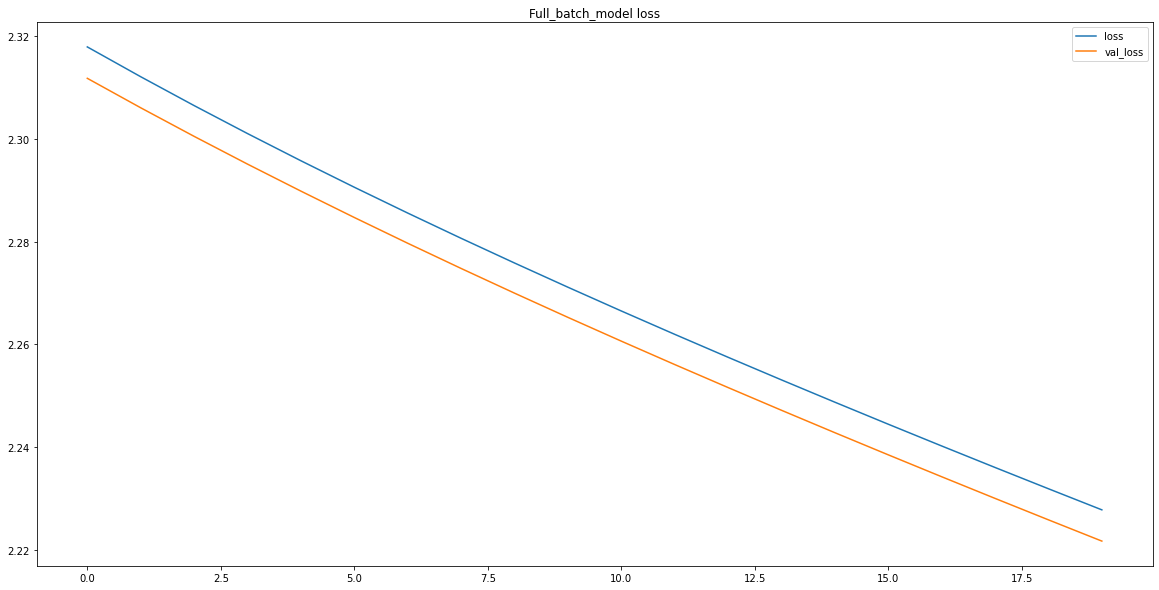

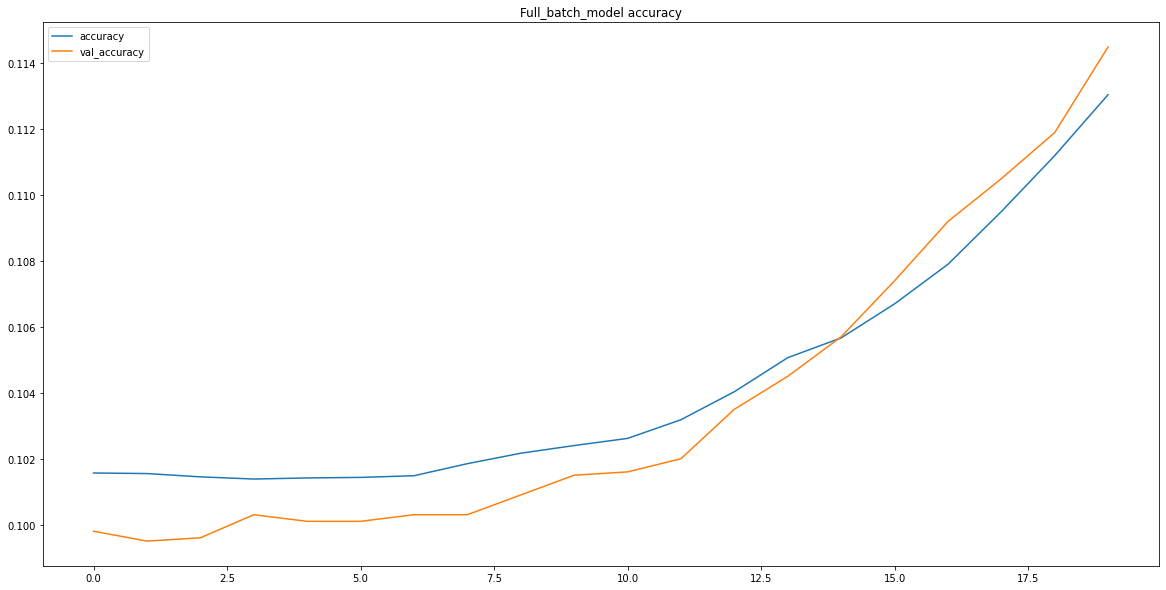

Full_batch_model loss:  2.221716
Full_batch_model accuracy:  0.1145
00 hours, 00 minutes, 16 seconds


In [11]:
# start run time
start_time = time.time() 
# build full batch model
model_full_batch, model_full_batch_history = build_model(activation='relu',batch_size=X_train.shape[0],epochs=nb_epoch)

# model results and visuals
model_full_batch_results = model_results(model_full_batch, model_full_batch_history, model_name='Full_Batch_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Compare the results of each model. Which batch size performed best?

The smallest batch size performs the best, but also as the longest run time. The full batch size does very poorly. It has 11% test accuracy, while the other two models had 95+% test accuracy. 

While the 8 batch size outperforms the 128 batch size, there is some overfitting concerns with the batch size of 8.

The RELU model has the best test accuracy of the 3 models. Its slightly performed better than the TANH and it performed significantly better than the sigmoid model.

## In this task, you'll implement several ANN models with different learning rates for the stochastic gradient descent. In all of the models below, use 128 as your mini-batch size.

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 0.01 as the learning rate.

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 1.7618 - accuracy: 0.5199 - val_loss: 0.6304 - val_accuracy: 0.8512
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5776 - accuracy: 0.8559 - val_loss: 0.4151 - val_accuracy: 0.8876
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4162 - accuracy: 0.8891 - val_loss: 0.3510 - val_accuracy: 0.9046
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3599 - accuracy: 0.9017 - val_loss: 0.3190 - val_accuracy: 0.9110
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3289 - accuracy: 0.9084 - val_loss: 0.2976 - val_accuracy: 0.9162
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3118 - accuracy: 0.9141 - val_loss: 0.2812 - val_accuracy: 0.9193
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2982 - accuracy: 0.9151 - val_loss: 0.2668 - val_accuracy: 0.9239
Epoch 

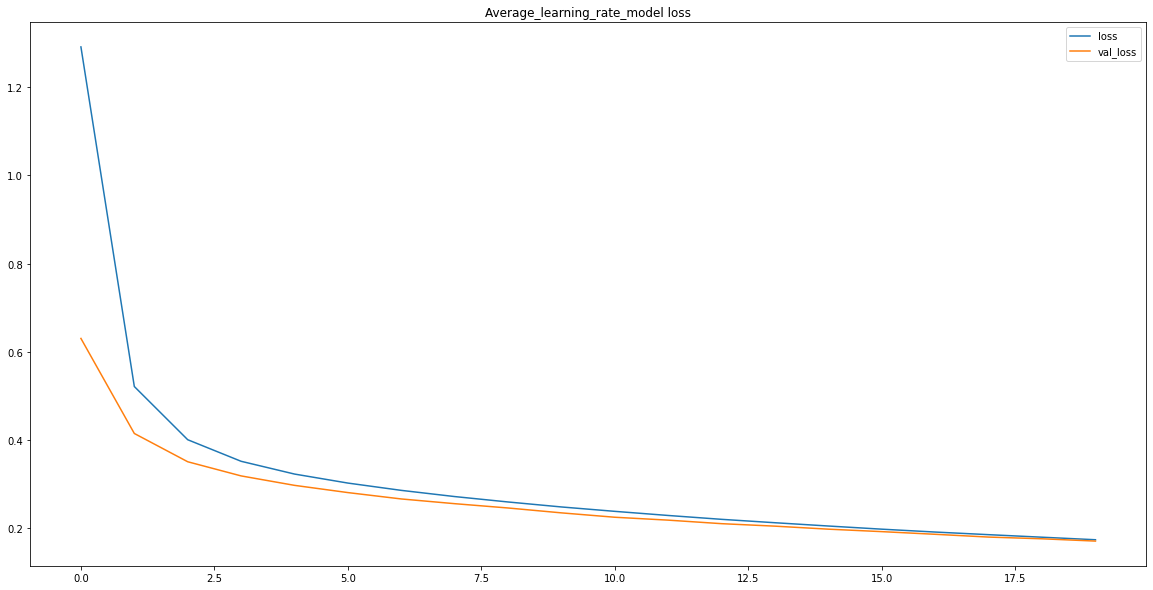

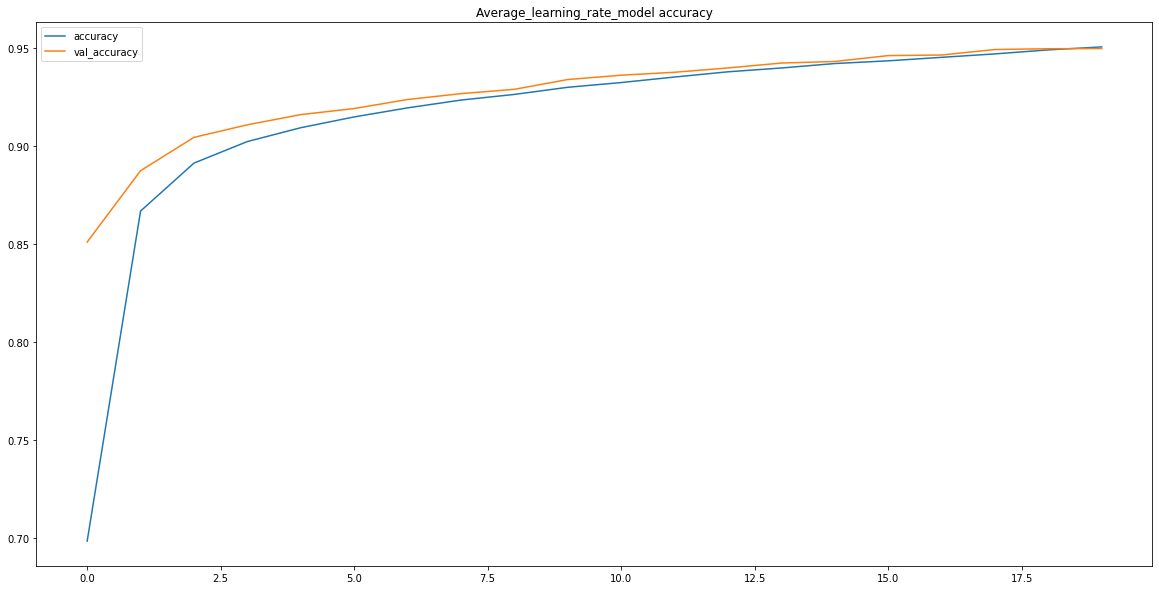

Average_learning_rate_model loss:  0.171311
Average_learning_rate_model accuracy:  0.9499
00 hours, 00 minutes, 36 seconds


In [12]:
# start run time
start_time = time.time() 

# build .01 learning rate model
medium_lr_model, medium_lr_model_history = build_model(learning_rate=.01,batch_size=batch_size,epochs=nb_epoch)

# model results and visuals
medium_lr_results = model_results(medium_lr_model, medium_lr_model_history, model_name='Average_Learning_Rate_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 100 as the learning rate.

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 146842029016793408844919520362496.0000 - accuracy: 0.1037 - val_loss: 43.6337 - val_accuracy: 0.0892
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 340.4549 - accuracy: 0.1012 - val_loss: 33.1537 - val_accuracy: 0.0974
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 41.7005 - accuracy: 0.1016 - val_loss: 47.0192 - val_accuracy: 0.0980
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 39.8085 - accuracy: 0.0995 - val_loss: 48.8825 - val_accuracy: 0.1028
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 40.6771 - accuracy: 0.1008 - val_loss: 35.8174 - val_accuracy: 0.0980
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 40.0426 - accuracy: 0.0984 - val_loss: 42.6367 - val_accuracy: 0.1032
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 40.0532 - accuracy: 0.0989 - v

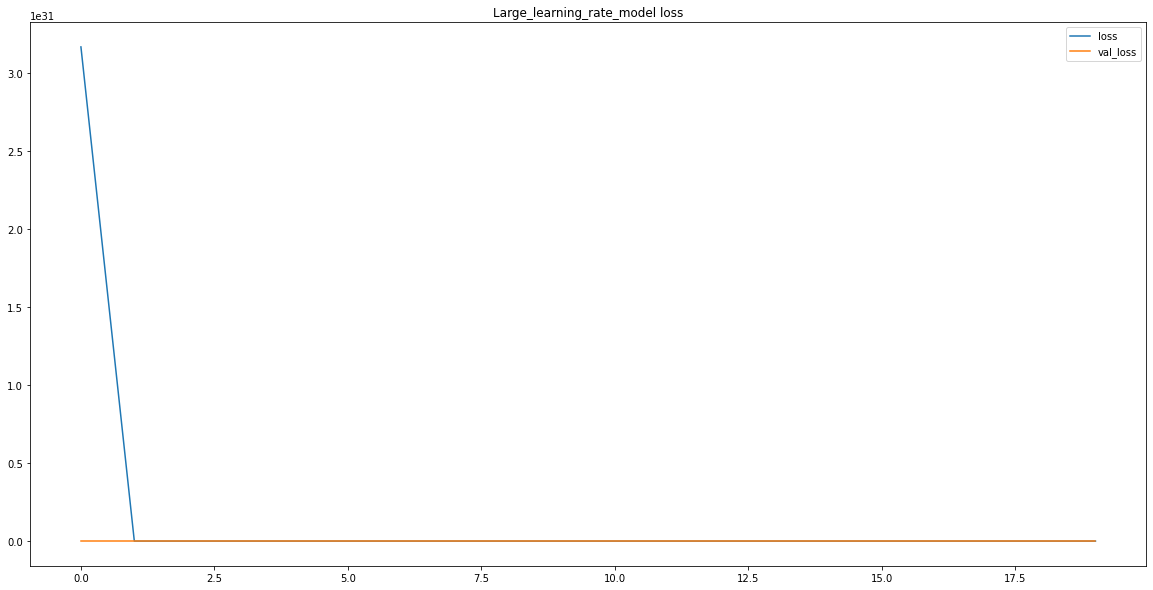

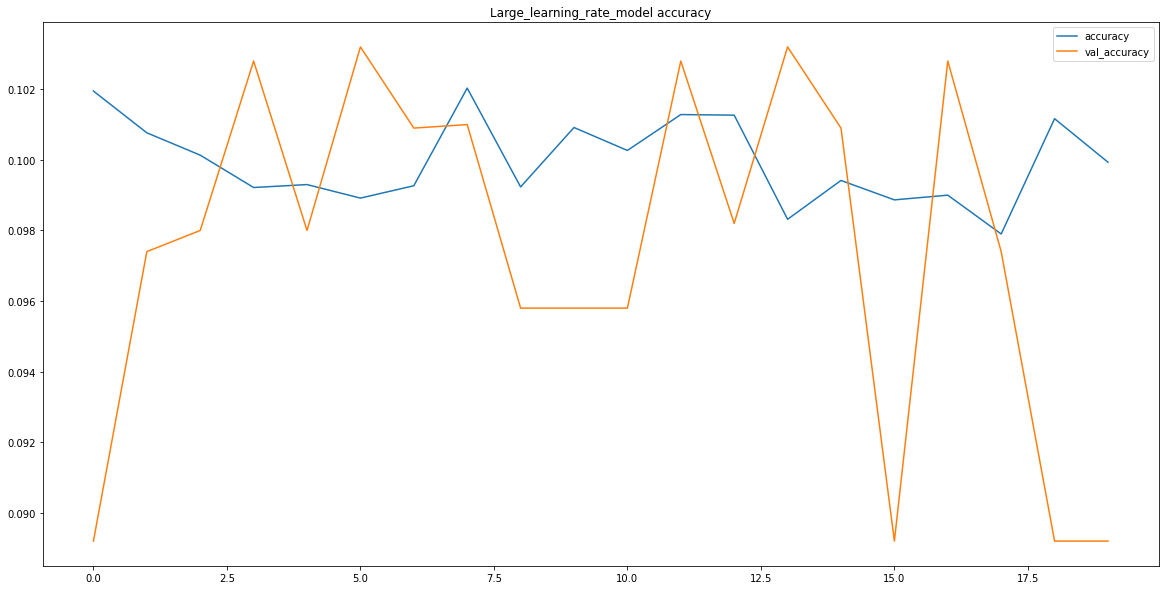

Large_learning_rate_model loss:  34.171261
Large_learning_rate_model accuracy:  0.0892
00 hours, 00 minutes, 38 seconds


In [13]:
# start run time
start_time = time.time() 

# build 100 learning rate model
large_lr_model, large_lr_model_history = build_model(learning_rate=100,batch_size=batch_size,epochs=nb_epoch)

# model results and visuals
large_lr_model_results = model_results(large_lr_model, large_lr_model_history, model_name='Large_Learning_Rate_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 0.0000001 as the learning rate.

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 2.3870 - accuracy: 0.1202 - val_loss: 2.3882 - val_accuracy: 0.1234
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 2.3869 - accuracy: 0.1206 - val_loss: 2.3882 - val_accuracy: 0.1234
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 2.3881 - accuracy: 0.1192 - val_loss: 2.3882 - val_accuracy: 0.1234
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 2.3869 - accuracy: 0.1216 - val_loss: 2.3882 - val_accuracy: 0.1234
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 2.3851 - accuracy: 0.1186 - val_loss: 2.3881 - val_accuracy: 0.1234
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 2.3868 - accuracy: 0.1185 - val_loss: 2.3881 - val_accuracy: 0.1234
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 2.3856 - accuracy: 0.1213 - val_loss: 2.3881 - val_accuracy: 0.1234
Epoch 

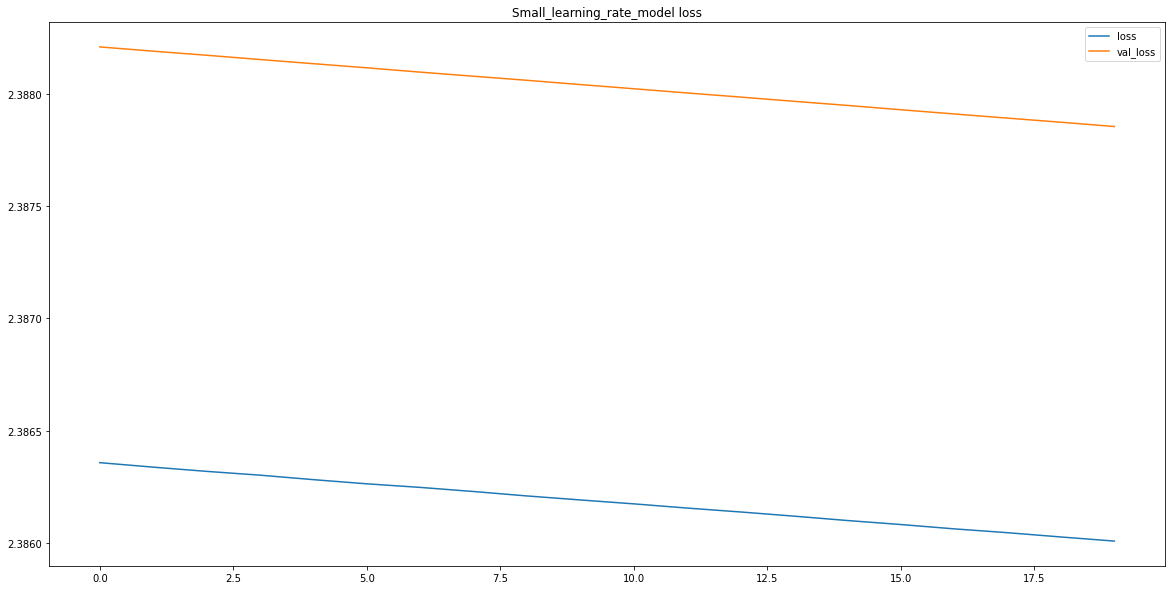

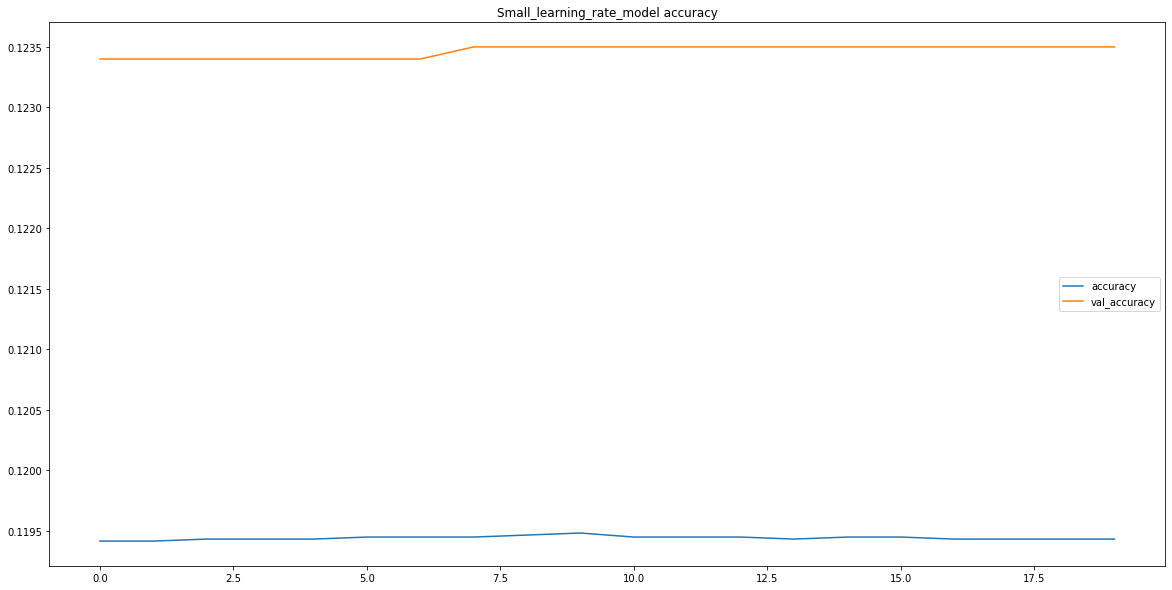

Small_learning_rate_model loss:  2.387858
Small_learning_rate_model accuracy:  0.1235
00 hours, 00 minutes, 36 seconds


In [14]:
# start run time
start_time = time.time() 

# build 0.0000001 learning rate model
small_lr_model, small_lr_model_history = build_model(learning_rate=0.0000001,batch_size=batch_size,epochs=nb_epoch)

# model results and visuals
small_lr_model_results = model_results(small_lr_model, small_lr_model_history, model_name='Small_Learning_Rate_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Compare the results of each model. Which learning rate performed best?

The medium learning rate model performed significantly better than the small and large learning rate models. The medium learning rate (0.01) model had a test accuracy of 95% while the other two model were below 13% test accuracy. 

The medium learning rate model converged, while the other two models did not. The large learning rate model diverged from the optimal solution, while the small learning rate model made to small of progress that it never converged.